In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re, string
from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter
from sklearn.feature_extraction import text
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading words: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [4]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [5]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [6]:
words = set(nltk.corpus.words.words())

In [7]:
df =  pd.read_csv("D:\MYPROJECT\Dataset\glassdoor_reviews.csv")

In [8]:
df.head()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."


In [9]:
df.shape

(838566, 18)

In [10]:
df.isnull().sum()

firm                        0
date_review                 0
job_title                   0
current                     0
location               297338
overall_rating              0
work_life_balance      149894
culture_values         191373
diversity_inclusion    702500
career_opp             147501
comp_benefits          150082
senior_mgmt            155876
recommend                   0
ceo_approv                  0
outlook                     0
headline                 2219
pros                        0
cons                        8
dtype: int64

In [11]:
df.isna().sum()

firm                        0
date_review                 0
job_title                   0
current                     0
location               297338
overall_rating              0
work_life_balance      149894
culture_values         191373
diversity_inclusion    702500
career_opp             147501
comp_benefits          150082
senior_mgmt            155876
recommend                   0
ceo_approv                  0
outlook                     0
headline                 2219
pros                        0
cons                        8
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838566 entries, 0 to 838565
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   firm                 838566 non-null  object 
 1   date_review          838566 non-null  object 
 2   job_title            838566 non-null  object 
 3   current              838566 non-null  object 
 4   location             541228 non-null  object 
 5   overall_rating       838566 non-null  int64  
 6   work_life_balance    688672 non-null  float64
 7   culture_values       647193 non-null  float64
 8   diversity_inclusion  136066 non-null  float64
 9   career_opp           691065 non-null  float64
 10  comp_benefits        688484 non-null  float64
 11  senior_mgmt          682690 non-null  float64
 12  recommend            838566 non-null  object 
 13  ceo_approv           838566 non-null  object 
 14  outlook              838566 non-null  object 
 15  headline         

In [13]:
df.head()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."


In [14]:
df.describe()

,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt
count,838566.000000,688672.000000,647193.000000,136066.000000,691065.000000,688484.000000,682690.000000
mean,3.655956,3.375735,3.590164,3.966612,3.461825,3.398109,3.176576
std,1.174684,1.305874,1.323280,1.190937,1.271295,1.218738,1.330720
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


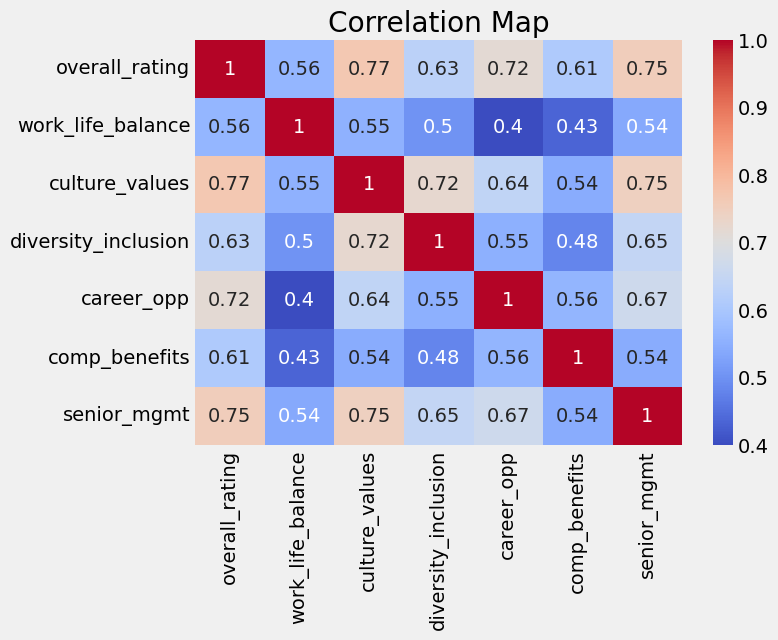

In [15]:
corr_matrix = df.corr()

# Create a correlation heatmap
plt.figure(figsize=(7, 5))  # Adjust the figure size as desired
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the correlation map
plt.title('Correlation Map')
plt.show()

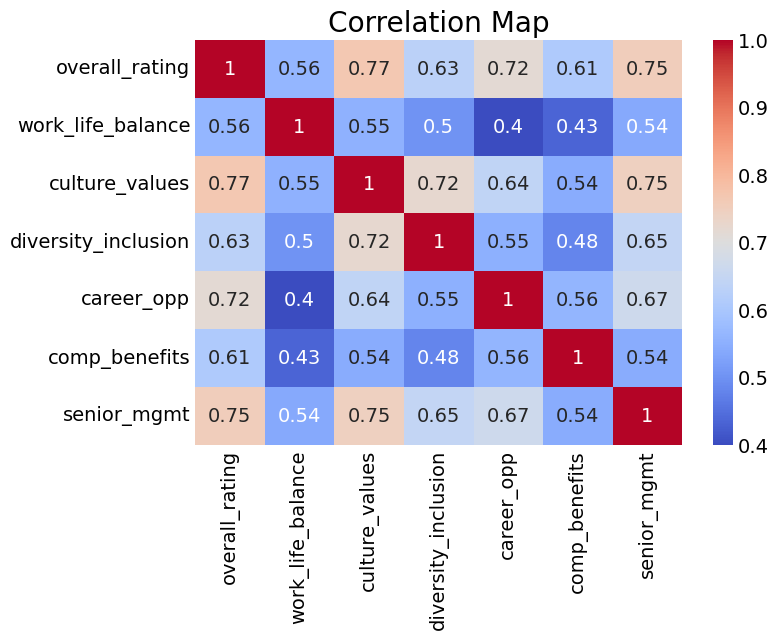

In [16]:
corr_matrix = df.corr()

# Create a correlation heatmap
plt.figure(figsize=(7, 5), facecolor='w')  # Set the facecolor to white
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the correlation map
plt.title('Correlation Map')
plt.show()


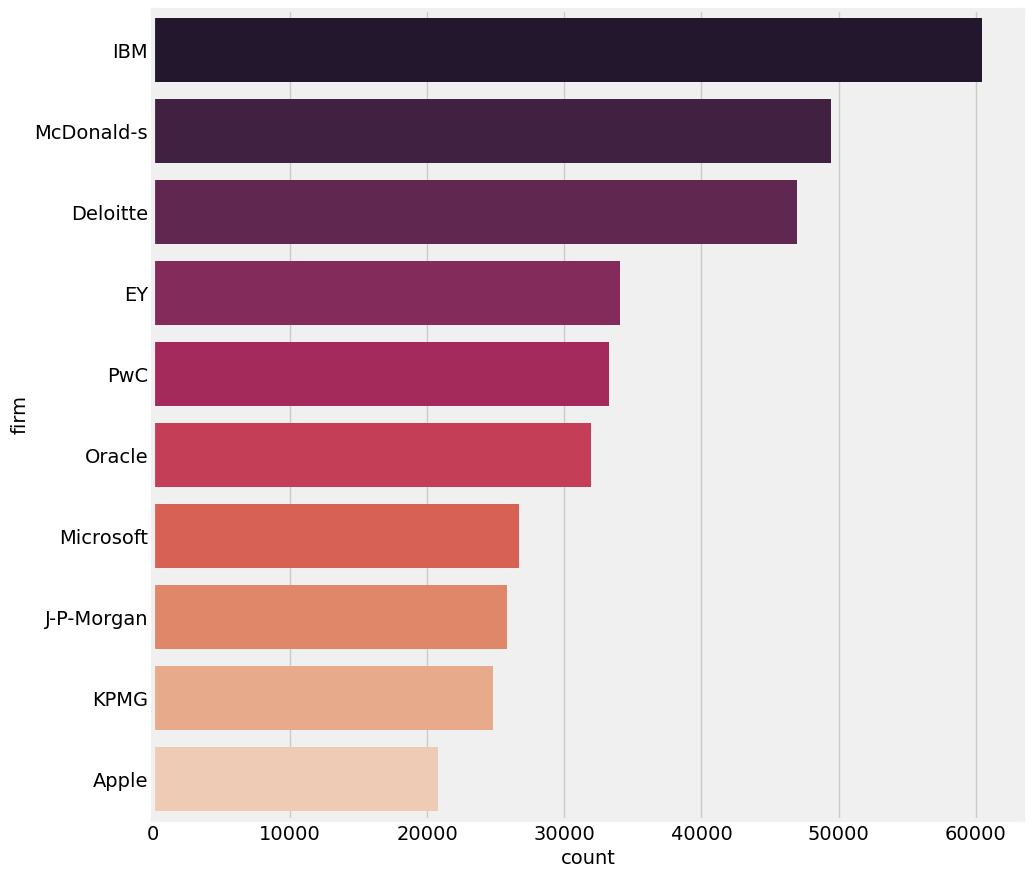

In [17]:
plt.figure(1, figsize=(10, 10), facecolor='w')  # Set the facecolor to white
sns.countplot(y='firm', data=df, palette='rocket', 
              order=df['firm'].value_counts().head(10).index)
plt.show()


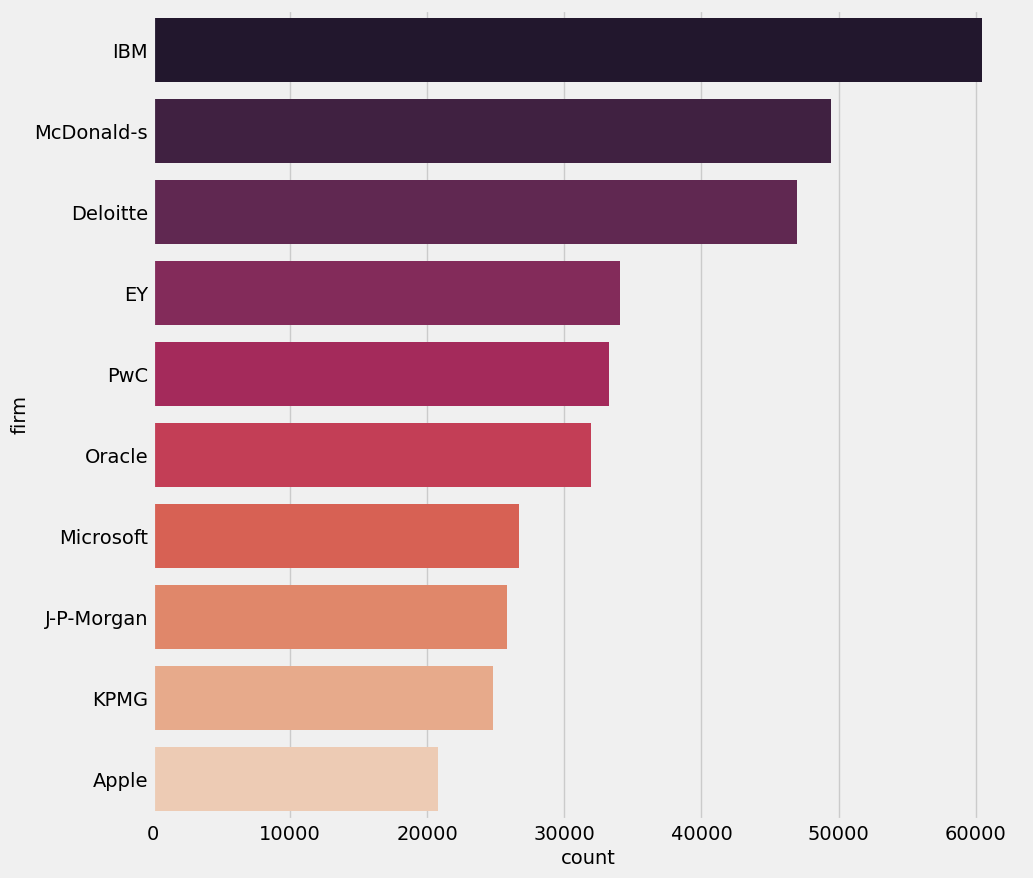

In [18]:
plt.figure(1 , figsize = (10 , 10))
sns.countplot(y = 'firm' , data = df , palette = 'rocket' , 
              order = df['firm'].value_counts().head(10).index)
plt.show()

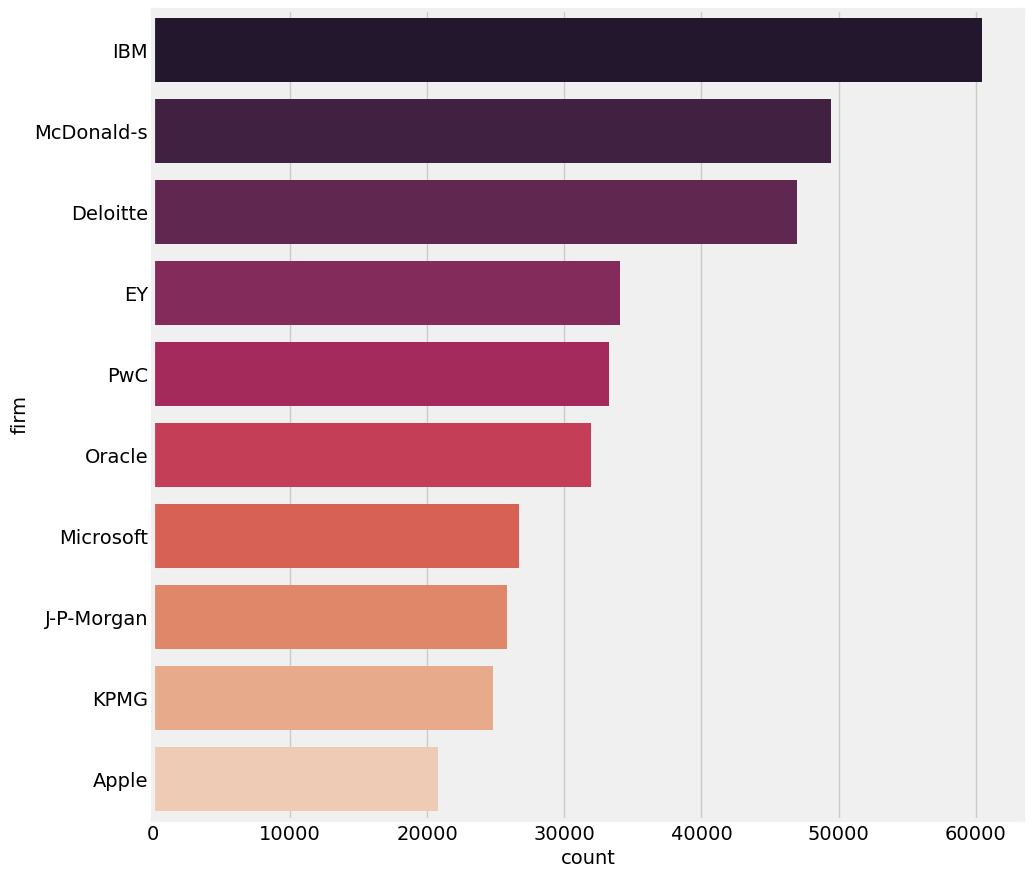

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1, figsize=(10, 10), facecolor='w')  # Set the facecolor to white
ax = sns.countplot(y='firm', data=df, palette='rocket',
                   order=df['firm'].value_counts().head(10).index)

# Set alpha (transparency) level
ax.set_alpha(0.8)  # Adjust the alpha value as desired (0.0 to 1.0)

plt.show()


In [20]:
common_job_titles = []
c = Counter(df['job_title']).most_common()[:10]
for n in range(10):
    common_job_titles.append(c[n][0])

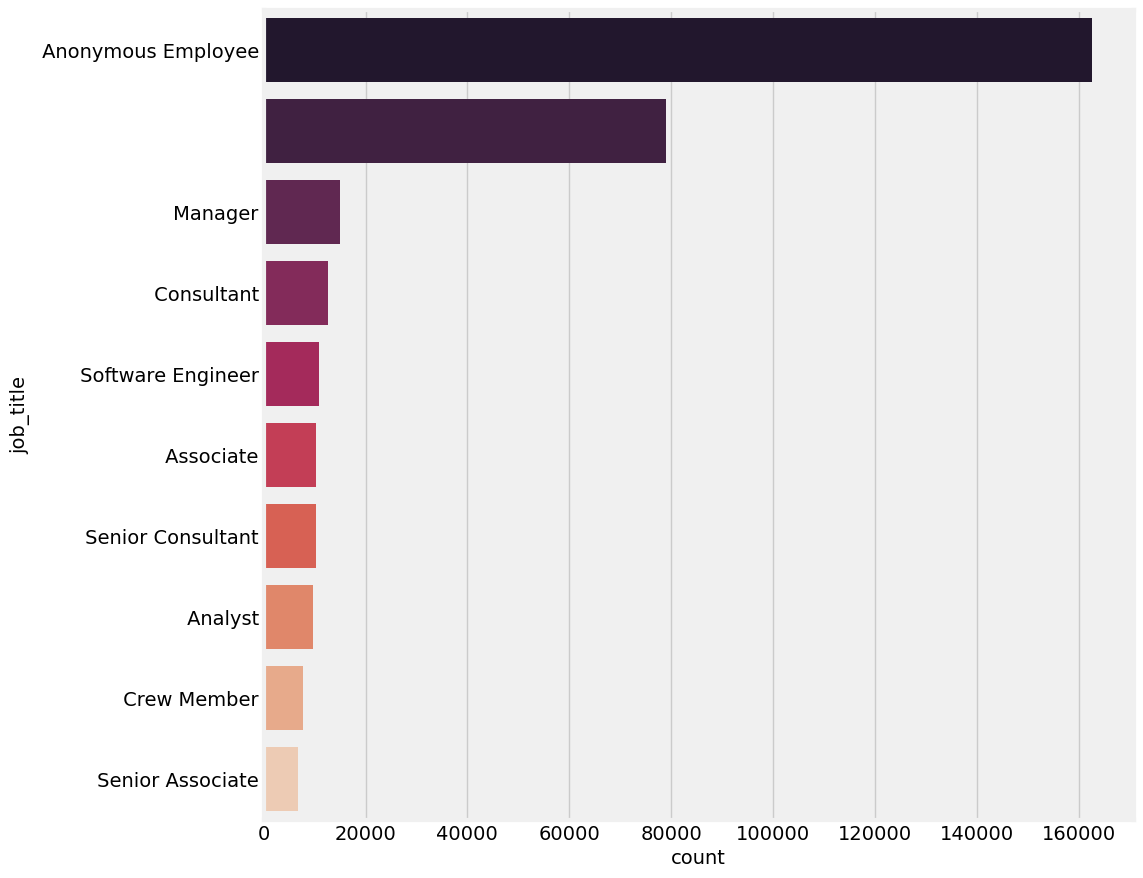

In [21]:
plt.figure(1 , figsize = (10 , 10), facecolor='w')
ax = sns.countplot(y = 'job_title' , data = df[df['job_title'].isin(common_job_titles)] ,
              palette = 'rocket' , 
              order = df[df['job_title'].isin(common_job_titles)]['job_title'].value_counts().index)
ax.set_alpha(0.8)  # Adjust the alpha value as desired (0.0 to 1.0)

plt.show()

In [22]:
common_location = []
c = Counter(df['location']).most_common()[:10]
for n in range(10):
    common_location.append(c[n][0])

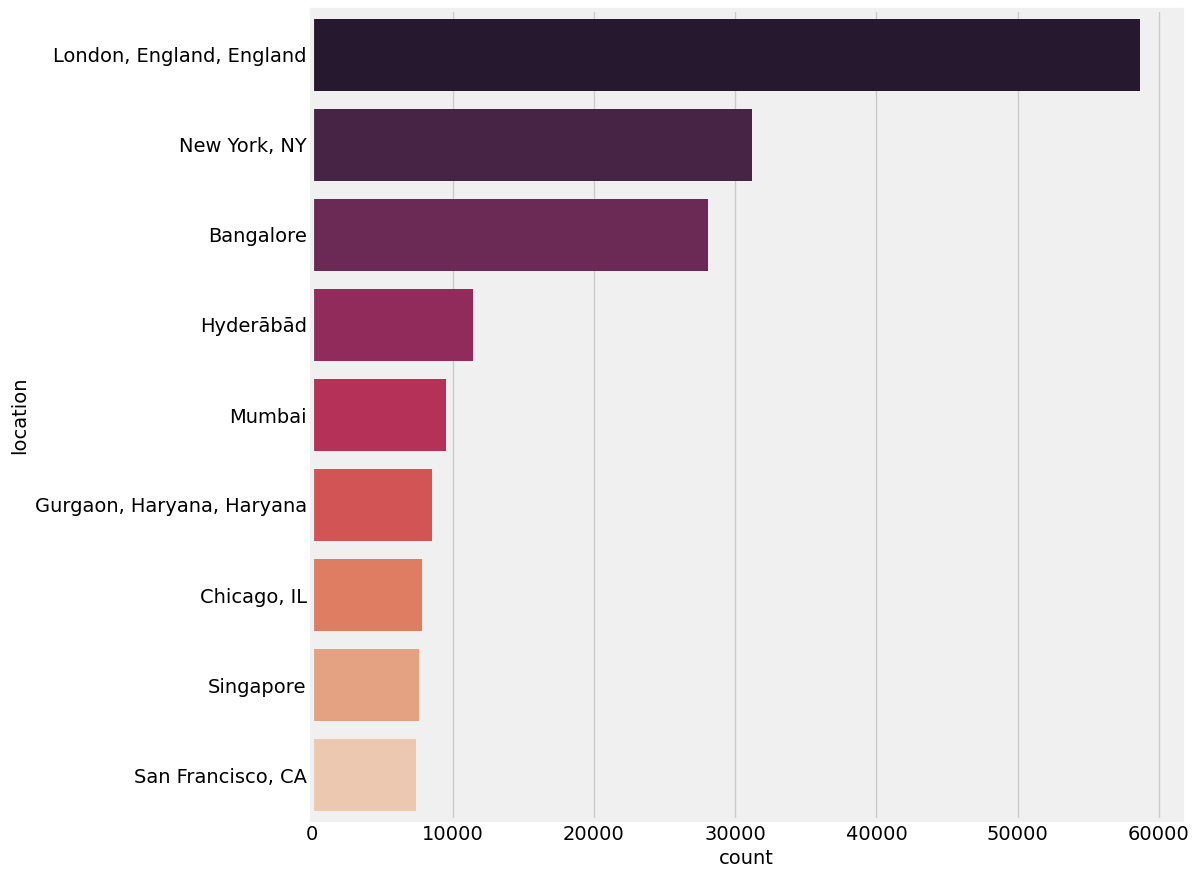

In [23]:
plt.figure(1 , figsize = (10 , 10), facecolor = 'w')
ax = sns.countplot(y = 'location' , data = df[df['location'].isin(common_location)] ,
              palette = 'rocket' , 
              order = df[df['location'].isin(common_location)]['location'].value_counts().index)
plt.title('')
ax.set_alpha(0.8)  # Adjust the alpha value as desired (0.0 to 1.0)
plt.show()

In [24]:
def year(x):
    if x == 'None':
        year = 0 
    else:
        year = int(x.split('-')[0])
    return year 

In [25]:
getYear =  lambda x : year(x)

In [26]:
df['year'] = df['date_review'].apply(getYear)
c = Counter(df['year'].sort_values())

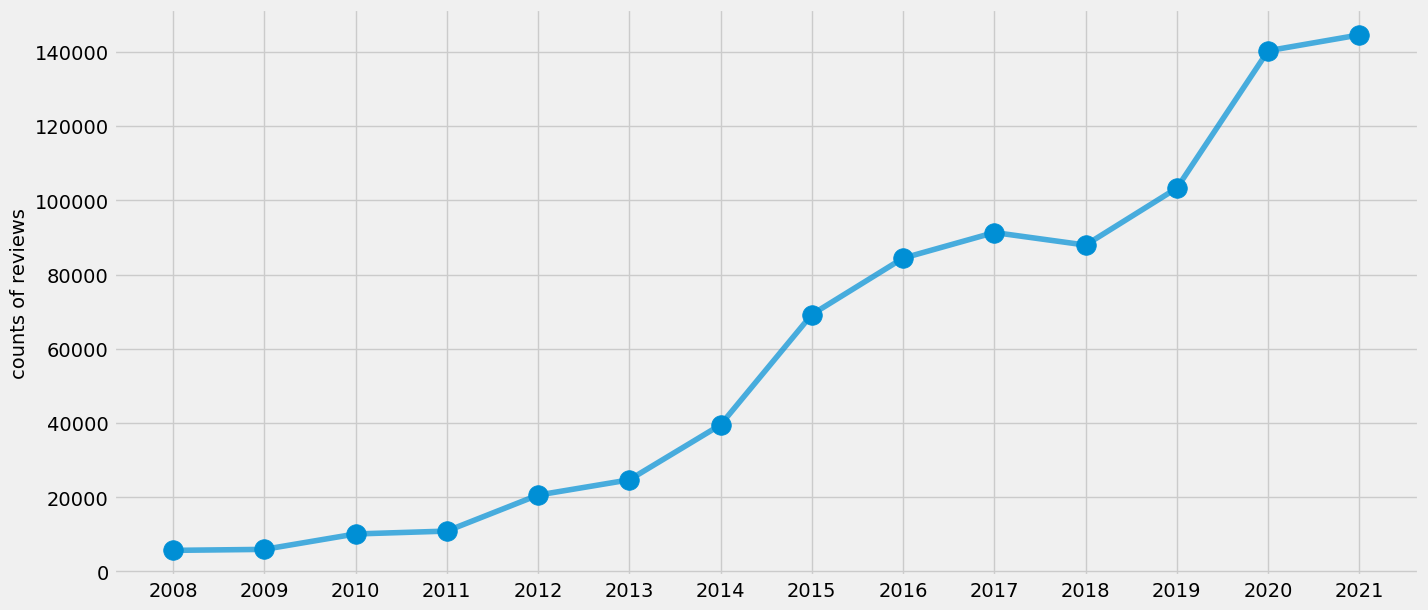

In [27]:
plt.figure(1 , figsize = (15 , 7))
plt.scatter(x = np.arange(len(c.values())) , y =  c.values() , s = 200 )
plt.plot(np.arange(len(c.values())) , c.values() , alpha = 0.7)
plt.xticks(np.arange(len(c.values())) , c.keys())
plt.ylabel('counts of reviews')
plt.show()

In [28]:
df['firm'].unique()

array(['AFH-Wealth-Management', 'AJ-Bell', 'ALDI', 'AQA', 'ASDA', 'ASOS',
       'AXA-UK', 'Abcam',
       'Abertawe-Bro-Morgannwg-University-Health-Board', 'Accenture',
       'Accor', 'Achieving-for-Children', 'ActionCOACH',
       'Active-Care-Group', 'Adecco', 'Age-UK-The-National-Charity',
       'AlixPartners', 'American-Express', 'Amey', 'Angard-Staffing',
       'Anglian-Water', 'Anglo-American',
       'Animal-and-Plant-Health-Agency', 'Aon', 'Apple', 'Arcadia',
       'Arnold-Clark', 'AstraZeneca', 'Aviva', 'B-and-M-Retail',
       'B-and-Q', 'BAT', 'BBC', 'BDO', 'BHS', 'BIS', 'BNP-Paribas',
       'BNY-Mellon', 'BP', 'BPP-Holdings', 'BT',
       'Babcock-International-Group', 'Babylon-Health',
       'Bain-and-Company', 'Balfour-Beatty', 'Bannatyne-Group',
       'Barchester-Healthcare', 'Barclays', 'Barnardo-s',
       'Barnet-and-Chase-Farm-Hospitals-NHS-Trust', 'Barnett-Waddingham',
       'Barratt-Developments', 'Barts-Health-NHS-Trust',
       'BayWa-r-e-renewable-energ

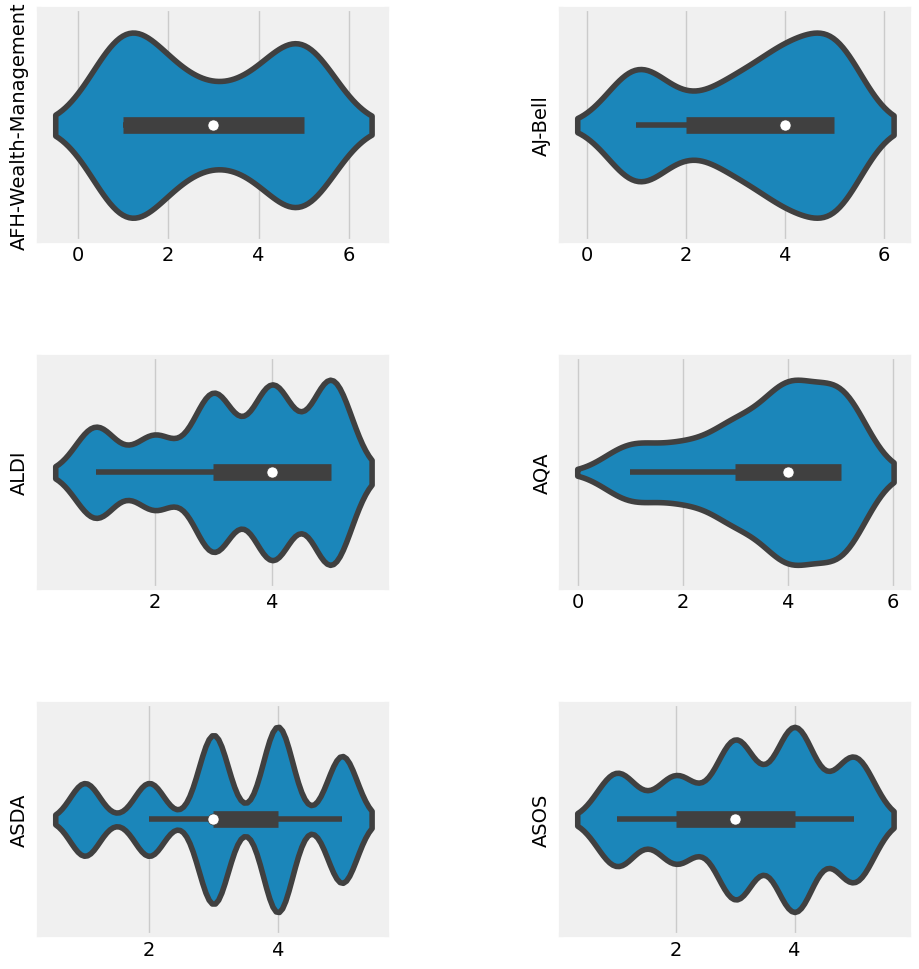

In [29]:
plt.figure(1 , figsize = (10 , 20),facecolor = 'w')
n = 0 
for company in df['firm'].unique()[:6]:
    n += 1
    plt.subplot(5 , 2 , n )
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    ax = sns.violinplot(x = 'overall_rating' , data = df.where(df['firm'] == company))
    plt.xlabel('')
    plt.ylabel(company)
    ax.set_alpha(0.8)
plt.show()

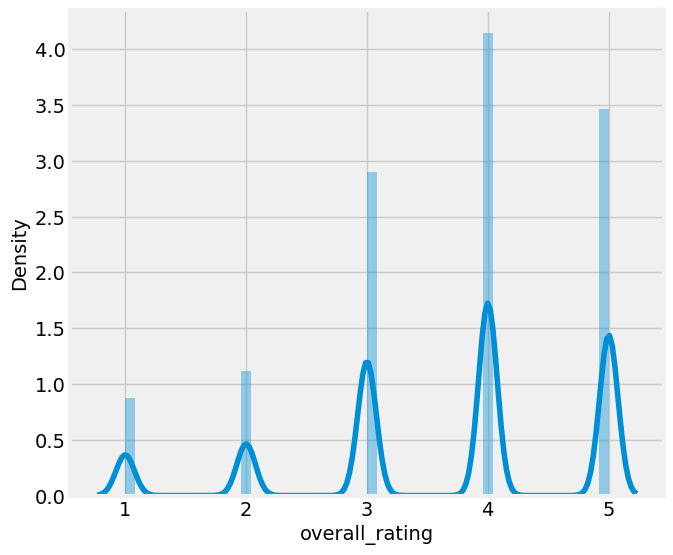

In [30]:
plt.figure(1 , figsize = (15 , 6),facecolor = 'w')
plt.subplot(1 , 2  , 1)
ax = sns.distplot(df['overall_rating'])
ax.set_alpha(0.8)
plt.show()

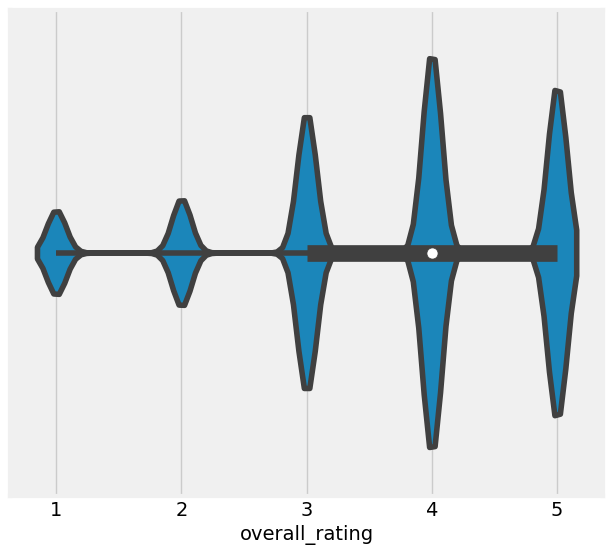

In [31]:
plt.figure(1 , figsize = (15 , 6), facecolor = 'w')
plt.subplot(1 , 2 , 2)
ax = sns.violinplot(x = 'overall_rating' , data = df)
ax.set_alpha(0.8)
plt.show()

In [32]:
df.dropna(inplace=True)

In [33]:
df.isna().sum()

firm                   0
date_review            0
job_title              0
current                0
location               0
overall_rating         0
work_life_balance      0
culture_values         0
diversity_inclusion    0
career_opp             0
comp_benefits          0
senior_mgmt            0
recommend              0
ceo_approv             0
outlook                0
headline               0
pros                   0
cons                   0
year                   0
dtype: int64

In [34]:
df.head()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,year
50,AFH-Wealth-Management,2020-10-01,Office Administrator,"Former Employee, more than 3 years","Bromsgrove, England, England",2,1.0,3.0,1.0,1.0,2.0,2.0,x,o,x,The people both make and destroy this place,"Great people in some places, excellent Christm...","Poor pay, huge gap for pay between senior mana...",2020
51,AFH-Wealth-Management,2021-02-05,Quality Control,Former Employee,"Birmingham, England, England",1,3.0,1.0,2.0,1.0,1.0,1.0,x,o,o,Very low salaries,"Majority of the people there are lovely, and t...",Salaries are much lower than market competitor...,2021
52,AFH-Wealth-Management,2021-02-07,IFA Administrator,"Former Employee, less than 1 year","Bromsgrove, England, England",4,3.0,3.0,4.0,4.0,4.0,2.0,v,o,v,Good,"Nice environment, love people, not too stressful",Management can be clicky at times,2021
53,AFH-Wealth-Management,2021-02-07,Investment Operations,"Former Employee, more than 1 year","Birmingham, England, England",3,5.0,5.0,4.0,3.0,1.0,2.0,x,o,v,AFH Review,-Great People\r\n-Heading in a good direction ...,-Low Salary\r\n-Middle Management likes to mic...,2021
60,AFH-Wealth-Management,2021-05-12,Client Engagement Executive,"Former Employee, less than 1 year","Birmingham, England, England",1,1.0,2.0,1.0,1.0,1.0,1.0,x,x,x,Terrible- avoid like the plague,"None, they lie about working hours, bonuses, p...",-Unachievable bonus unfairly set by manager\n-...,2021


In [35]:
features = ['work_life_balance' , 'culture_values' , 'career_opp',
                     'comp_benefits','senior_mgmt']
index_companies = ['Google' , 'Amazon' , 'Facebook' , 'Netflix' , 'Apple' , 'Microsoft']

In [36]:
mean_rating_df = pd.DataFrame(index = index_companies) 

In [37]:
for feature in features:
    f = []
    for comp in index_companies:
        f.append(np.mean(df[feature][df['firm'] == comp]))
    print(f)
    mean_rating_df[feature] = f
del f

[4.194098662978331, nan, 3.560747663551402, nan, 3.672037914691943, 4.018715440238196]
[4.355463347164592, nan, 4.074766355140187, nan, 4.283412322274882, 4.346235644406636]
[4.2909174734900875, nan, 4.224299065420561, nan, 3.8578199052132702, 4.164185452998724]
[4.500691562932227, nan, 4.514018691588785, nan, 4.3246445497630335, 4.129732028923862]
[4.077455048409405, nan, 3.8878504672897196, nan, 3.801421800947867, 3.9940450871969375]


In [38]:
mean_rating_df

,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt
Google,4.194099,4.355463,4.290917,4.500692,4.077455
Amazon,NaN,NaN,NaN,NaN,NaN
Facebook,3.560748,4.074766,4.224299,4.514019,3.887850
Netflix,NaN,NaN,NaN,NaN,NaN
Apple,3.672038,4.283412,3.857820,4.324645,3.801422
Microsoft,4.018715,4.346236,4.164185,4.129732,3.994045


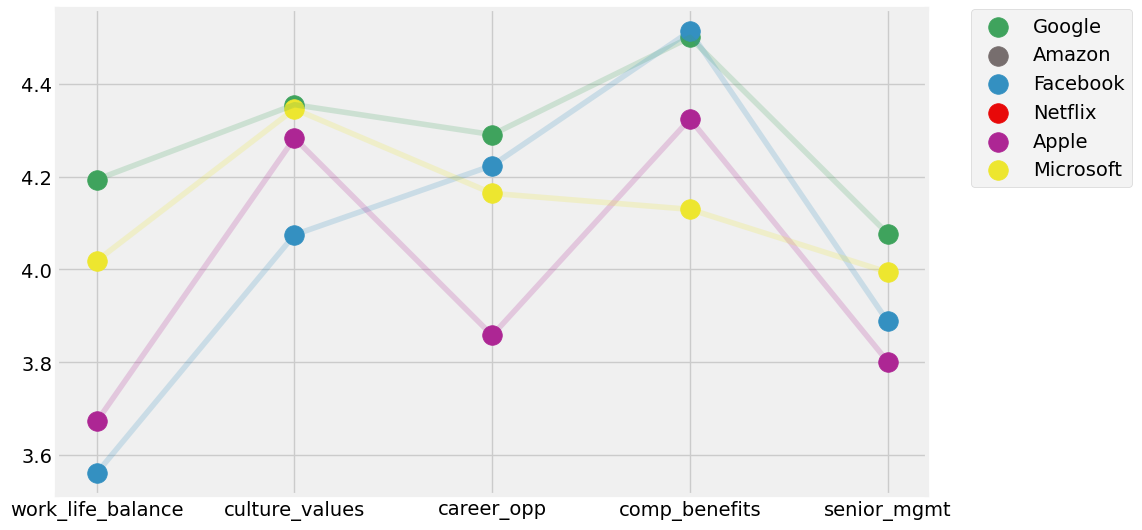

In [39]:
plt.figure(1 , figsize = (10 , 6), facecolor = 'w')
colors = ['#3fa35d' , '#776e6e' , '#3490c1' , 
         '#e80909' , '#ad2694'  ,  '#ede62f']
for n , c  in zip(range(6) , colors):
    plt.scatter(x = np.arange(5) , y = mean_rating_df.iloc[n , :].values , s = 200 , c = c  , label = mean_rating_df.index[n])
    plt.plot(np.arange(5) , mean_rating_df.iloc[n , :].values , '-' , color = c , 
             alpha = 0.2)
    plt.xticks(np.arange(5) , features)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)    
plt.show()

In [40]:
df["summary"] = df["headline"] + " " + df["pros"] + " " + df["cons"]

In [41]:
%%time
df["summary"] = df["summary"].str.lower()
df["headline"] = df["headline"].str.lower()
df["pros"] = df["pros"].str.lower()
df["cons"] = df["cons"].str.lower()

CPU times: total: 234 ms
Wall time: 314 ms


In [42]:
%%time
df['summary'] = df['summary'].str.encode('ascii', 'ignore').str.decode('ascii')
df['headline'] = df['headline'].str.encode('ascii', 'ignore').str.decode('ascii')
df['pros'] = df['pros'].str.encode('ascii', 'ignore').str.decode('ascii')
df['cons'] = df['cons'].str.encode('ascii', 'ignore').str.decode('ascii')

CPU times: total: 734 ms
Wall time: 859 ms


In [43]:
%%time
df['summary'] = df['summary'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df['headline'] = df['headline'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df['pros'] = df['pros'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df['cons'] = df['cons'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

CPU times: total: 875 ms
Wall time: 1.04 s


In [44]:
%%time
df['summary'] = df['summary'].apply(lambda x: re.split('<.*?>', str(x))[0])
df['headline'] = df['headline'].apply(lambda x: re.split('<.*?>', str(x))[0])
df['pros'] = df['pros'].apply(lambda x: re.split('<.*?>', str(x))[0])
df['cons'] = df['cons'].apply(lambda x: re.split('<.*?>', str(x))[0])

CPU times: total: 891 ms
Wall time: 1.09 s


In [45]:
%%time
df['summary'] = df['summary'].apply(lambda x: re.sub("@[A-Za-z0-9_]+","", str(x))).apply(lambda x: re.sub("#[A-Za-z0-9_]+","", str(x)))
df['headline'] = df['headline'].apply(lambda x: re.sub("@[A-Za-z0-9_]+","", str(x))).apply(lambda x: re.sub("#[A-Za-z0-9_]+","", str(x)))
df['pros'] = df['pros'].apply(lambda x: re.sub("@[A-Za-z0-9_]+","", str(x))).apply(lambda x: re.sub("#[A-Za-z0-9_]+","", str(x)))
df['cons'] = df['cons'].apply(lambda x: re.sub("@[A-Za-z0-9_]+","", str(x))).apply(lambda x: re.sub("#[A-Za-z0-9_]+","", str(x)))

CPU times: total: 1.69 s
Wall time: 1.99 s


In [46]:
%%time
df['summary'] = df['summary'].apply(lambda txt: re.compile(r'(.)\1{2,}', re.IGNORECASE).sub(r'\1', txt))
df['headline'] = df['headline'].apply(lambda txt: re.compile(r'(.)\1{2,}', re.IGNORECASE).sub(r'\1', txt))
df['pros'] = df['pros'].apply(lambda txt: re.compile(r'(.)\1{2,}', re.IGNORECASE).sub(r'\1', txt))
df['cons'] = df['cons'].apply(lambda txt: re.compile(r'(.)\1{2,}', re.IGNORECASE).sub(r'\1', txt))

CPU times: total: 5.33 s
Wall time: 6.57 s


In [47]:
%%time
table = str.maketrans("","", string.punctuation)
df['summary'] = df['summary'].apply(lambda x: x.translate(table))
df['headline'] = df['headline'].apply(lambda x: x.translate(table))
df['pros'] = df['pros'].apply(lambda x: x.translate(table))
df['cons'] = df['cons'].apply(lambda x: x.translate(table))

CPU times: total: 781 ms
Wall time: 1.15 s


In [48]:
from autocorrect import Speller

In [49]:
sc = Speller(lang="en", fast=True)

In [50]:
%%time
#df['summary'] = df['summary'].apply(lambda text : sc(text))
#df['headline'] = df['headline'].apply(lambda text : sc(text))
#df['pros'] = df['pros'].apply(lambda text : sc(text))
#df['summary'] = df['summary'].apply(lambda text : sc(text))

CPU times: total: 0 ns
Wall time: 0 ns


In [51]:
%%time
df['summary'] = df["summary"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))
df['headline'] = df["headline"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))
df['pros'] = df["pros"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))
df['cons'] = df["cons"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))

CPU times: total: 24.1 s
Wall time: 28.7 s


In [52]:
%%time
df['summary'] = df["summary"].apply(lambda x: ' '.join(w for w in x.split() if w in words))
df['headline'] = df["headline"].apply(lambda x: ' '.join(w for w in x.split() if w in words))
df['pros'] = df["pros"].apply(lambda x: ' '.join(w for w in x.split() if w in words))
df['cons'] = df["cons"].apply(lambda x: ' '.join(w for w in x.split() if w in words))

CPU times: total: 1.56 s
Wall time: 2.11 s


In [53]:
df

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,year,summary
50,AFH-Wealth-Management,2020-10-01,Office Administrator,"Former Employee, more than 3 years","Bromsgrove, England, England",2,1.0,3.0,1.0,1.0,2.0,2.0,x,o,x,people make destroy place,great people excellent,poor pay huge gap pay senior management suppor...,2020,people make destroy place great people excelle...
51,AFH-Wealth-Management,2021-02-05,Quality Control,Former Employee,"Birmingham, England, England",1,3.0,1.0,2.0,1.0,1.0,1.0,x,o,o,low,majority people lovely thats pro,much lower market standard salary ladder pay i...,2021,low majority people lovely thats pro much lowe...
52,AFH-Wealth-Management,2021-02-07,IFA Administrator,"Former Employee, less than 1 year","Bromsgrove, England, England",4,3.0,3.0,4.0,4.0,4.0,2.0,v,o,v,good,nice environment love people stressful,management clicky times,2021,good nice environment love people stressful ma...
53,AFH-Wealth-Management,2021-02-07,Investment Operations,"Former Employee, more than 1 year","Birmingham, England, England",3,5.0,5.0,4.0,3.0,1.0,2.0,x,o,v,review,great people heading good direction generally,low salary middle management micro manage staf...,2021,review great people heading good direction gen...
60,AFH-Wealth-Management,2021-05-12,Client Engagement Executive,"Former Employee, less than 1 year","Birmingham, England, England",1,1.0,2.0,1.0,1.0,1.0,1.0,x,x,x,terrible avoid like plague,none lie working pay,unachievable bonus unfairly set manager bullyi...,2021,terrible avoid like plague none lie working pa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838556,the-LEGO-Group,2021-05-21,Sales Associate (Brick Specialist),"Former Employee, less than 1 year","Bloomington, MN",4,5.0,4.0,5.0,4.0,2.0,5.0,v,v,v,working pretty cool,fun walk around store,doesnt pay living wage,2021,working pretty cool fun walk around store does...
838558,the-LEGO-Group,2021-05-25,Senior Product Manager,Current Employee,"London, England, England",4,3.0,4.0,2.0,3.0,2.0,3.0,v,r,v,great brand,family great brand culture still,lot bureaucracy hard make happen quickly cultu...,2021,great brand family great brand culture still l...
838560,the-LEGO-Group,2021-05-31,Senior Experience Designer,"Current Employee, less than 1 year",Billund,5,5.0,5.0,5.0,5.0,5.0,5.0,v,v,v,awesome place work,company clear purpose one truly,global brand compliance important lot,2021,awesome place work company clear purpose one t...
838561,the-LEGO-Group,2021-06-02,Marketing Manager,"Current Employee, more than 5 years","München, Bavaria, Bavaria",5,4.0,5.0,4.0,4.0,4.0,4.0,v,v,v,awesome company work,great company awesome product smart strong peo...,easy transfer,2021,awesome company work great company awesome pro...


In [54]:
df.drop_duplicates(subset='summary',inplace=True)

In [55]:
df

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,year,summary
50,AFH-Wealth-Management,2020-10-01,Office Administrator,"Former Employee, more than 3 years","Bromsgrove, England, England",2,1.0,3.0,1.0,1.0,2.0,2.0,x,o,x,people make destroy place,great people excellent,poor pay huge gap pay senior management suppor...,2020,people make destroy place great people excelle...
51,AFH-Wealth-Management,2021-02-05,Quality Control,Former Employee,"Birmingham, England, England",1,3.0,1.0,2.0,1.0,1.0,1.0,x,o,o,low,majority people lovely thats pro,much lower market standard salary ladder pay i...,2021,low majority people lovely thats pro much lowe...
52,AFH-Wealth-Management,2021-02-07,IFA Administrator,"Former Employee, less than 1 year","Bromsgrove, England, England",4,3.0,3.0,4.0,4.0,4.0,2.0,v,o,v,good,nice environment love people stressful,management clicky times,2021,good nice environment love people stressful ma...
53,AFH-Wealth-Management,2021-02-07,Investment Operations,"Former Employee, more than 1 year","Birmingham, England, England",3,5.0,5.0,4.0,3.0,1.0,2.0,x,o,v,review,great people heading good direction generally,low salary middle management micro manage staf...,2021,review great people heading good direction gen...
60,AFH-Wealth-Management,2021-05-12,Client Engagement Executive,"Former Employee, less than 1 year","Birmingham, England, England",1,1.0,2.0,1.0,1.0,1.0,1.0,x,x,x,terrible avoid like plague,none lie working pay,unachievable bonus unfairly set manager bullyi...,2021,terrible avoid like plague none lie working pa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838556,the-LEGO-Group,2021-05-21,Sales Associate (Brick Specialist),"Former Employee, less than 1 year","Bloomington, MN",4,5.0,4.0,5.0,4.0,2.0,5.0,v,v,v,working pretty cool,fun walk around store,doesnt pay living wage,2021,working pretty cool fun walk around store does...
838558,the-LEGO-Group,2021-05-25,Senior Product Manager,Current Employee,"London, England, England",4,3.0,4.0,2.0,3.0,2.0,3.0,v,r,v,great brand,family great brand culture still,lot bureaucracy hard make happen quickly cultu...,2021,great brand family great brand culture still l...
838560,the-LEGO-Group,2021-05-31,Senior Experience Designer,"Current Employee, less than 1 year",Billund,5,5.0,5.0,5.0,5.0,5.0,5.0,v,v,v,awesome place work,company clear purpose one truly,global brand compliance important lot,2021,awesome place work company clear purpose one t...
838561,the-LEGO-Group,2021-06-02,Marketing Manager,"Current Employee, more than 5 years","München, Bavaria, Bavaria",5,4.0,5.0,4.0,4.0,4.0,4.0,v,v,v,awesome company work,great company awesome product smart strong peo...,easy transfer,2021,awesome company work great company awesome pro...


In [56]:
deleteRows = df[df['summary'].str.split().str.len()<=3].index 

In [57]:
df.drop(deleteRows, axis = 0, inplace=True)

In [58]:
df["summary"]

50        people make destroy place great people excelle...
51        low majority people lovely thats pro much lowe...
52        good nice environment love people stressful ma...
53        review great people heading good direction gen...
60        terrible avoid like plague none lie working pa...
                                ...                        
838556    working pretty cool fun walk around store does...
838558    great brand family great brand culture still l...
838560    awesome place work company clear purpose one t...
838561    awesome company work great company awesome pro...
838565    strongly recommend group employer group compan...
Name: summary, Length: 103888, dtype: object

In [59]:
df["summary"].iloc[2]

'good nice environment love people stressful management clicky times'

In [60]:
df["summary"].iloc[0]

'people make destroy place great people excellent poor pay huge gap pay senior management support bully yet one driven away lack flexibility'

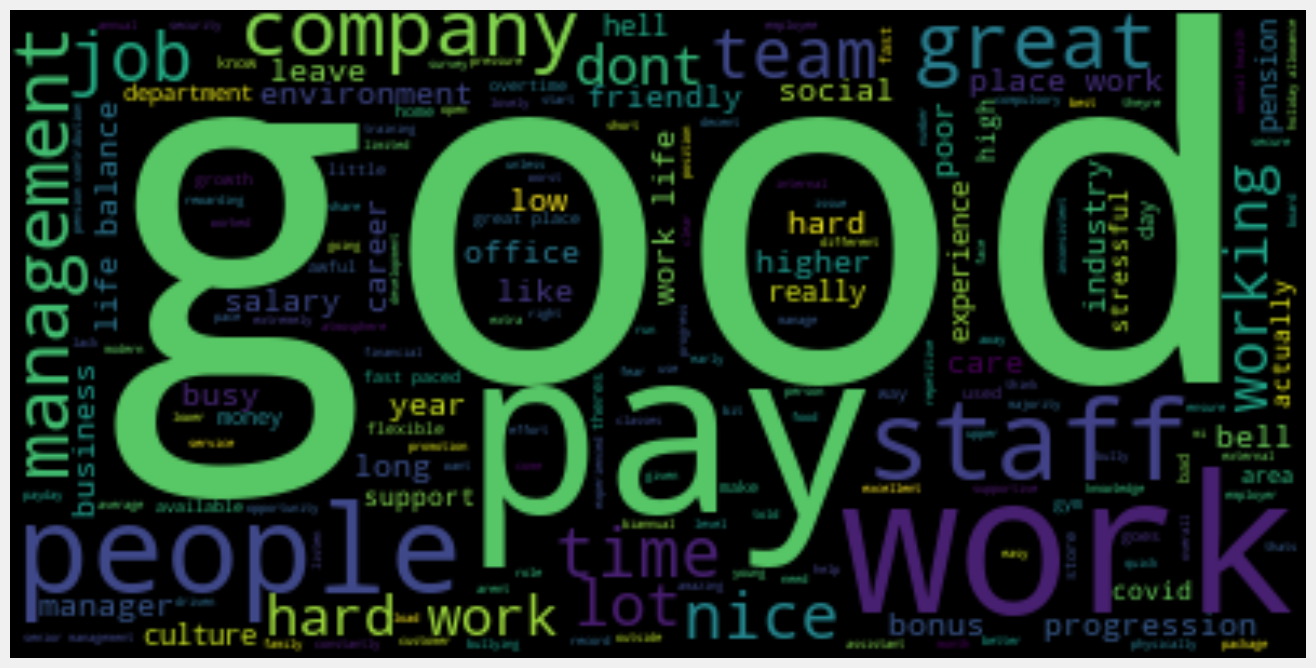

In [61]:
wc = WordCloud(stopwords = text.ENGLISH_STOP_WORDS, 
               
               max_font_size = 150 , 
               random_state = 42)
corpus = ''
for corp in df['summary'].head(100).values:
    corpus = corpus+' '+corp
wc.generate(corpus)
plt.figure(1 , figsize = (15 , 8))
plt.imshow(wc , interpolation="bilinear")
plt.axis("off")
plt.show()

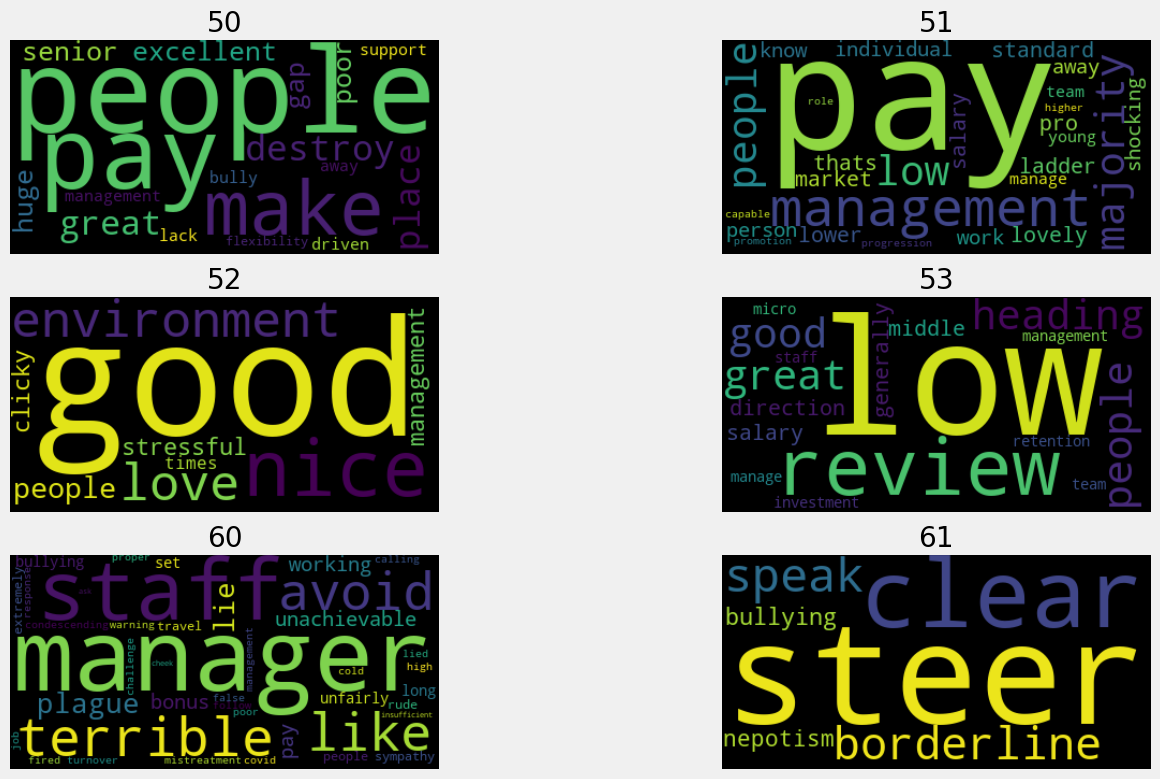

In [62]:
wc = WordCloud(stopwords = text.ENGLISH_STOP_WORDS.union(['Apple' , 'Netflix' , 'Google']), 
               
               max_font_size = 150 , 
               random_state = 42)

plt.figure(1 , figsize = (15 , 9))
for corpus , i in zip(df['summary'].values,range(6)):
    wc.generate(corpus)
    plt.subplot(3 , 2 , i + 1)
    plt.imshow(wc , interpolation="bilinear")
    plt.axis("off")
    plt.title(df.index[i])
plt.show()

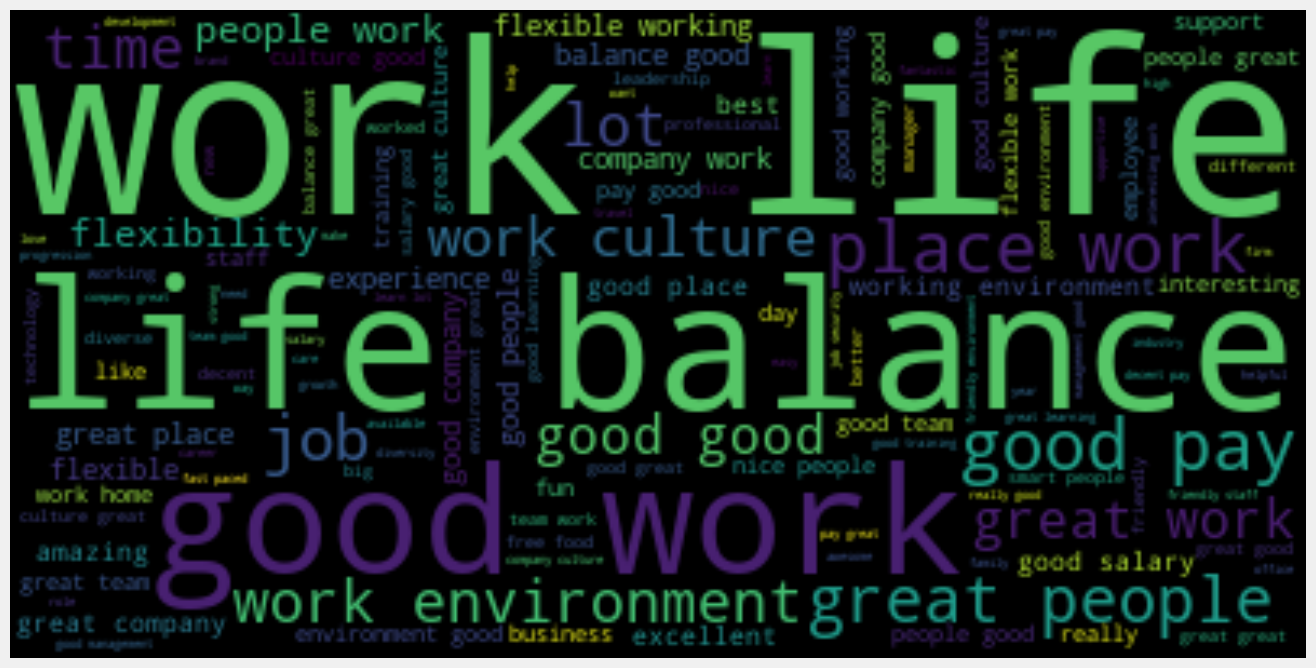

In [63]:
wc = WordCloud(stopwords = text.ENGLISH_STOP_WORDS, 
               max_font_size = 150 , 
               random_state = 42)
corpus = ''
for corp in df['pros'].values:
    corpus = corpus+' '+corp
wc.generate(corpus)
plt.figure(1 , figsize = (15 , 8))
plt.imshow(wc , interpolation="bilinear")
plt.axis("off")
plt.show()

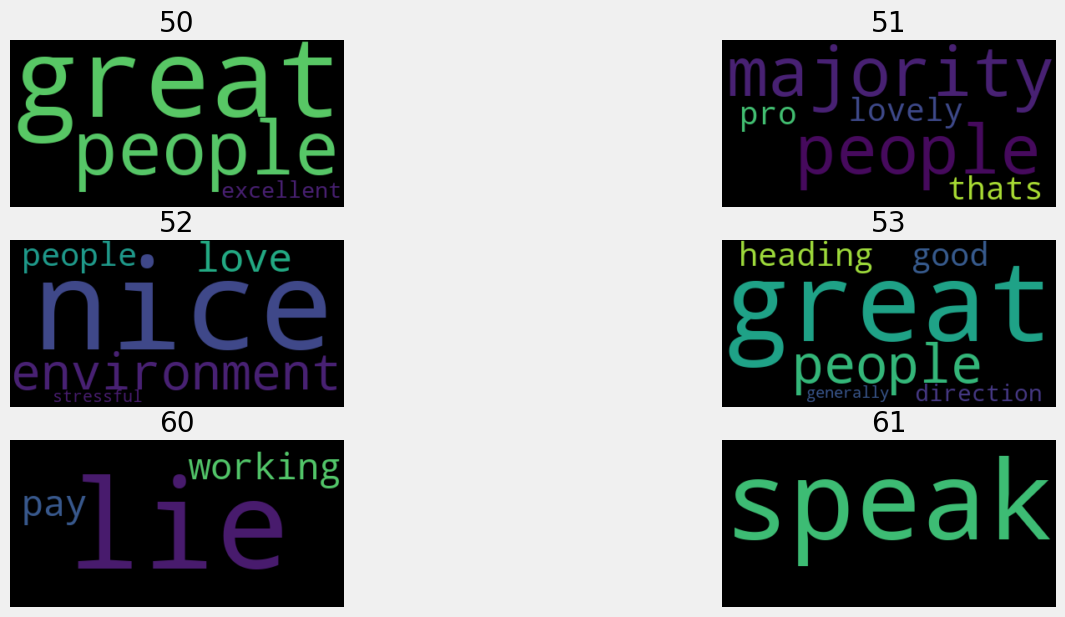

In [64]:
wc = WordCloud(stopwords = text.ENGLISH_STOP_WORDS.union(['Apple' , 'Google' , 'Facebook' , 'Amazon' , 'Netflix' , 'Microsoft']), 
               max_font_size = 150 , 
               random_state = 42)

plt.figure(1 , figsize = (15 , 7))
for corpus , i in zip(df['pros'].values,range(6)):
    wc.generate(corpus)
    plt.subplot(3 , 2 , i + 1)
    plt.imshow(wc , interpolation="bilinear")
    plt.axis("off")
    plt.title(df.index[i])
plt.show()

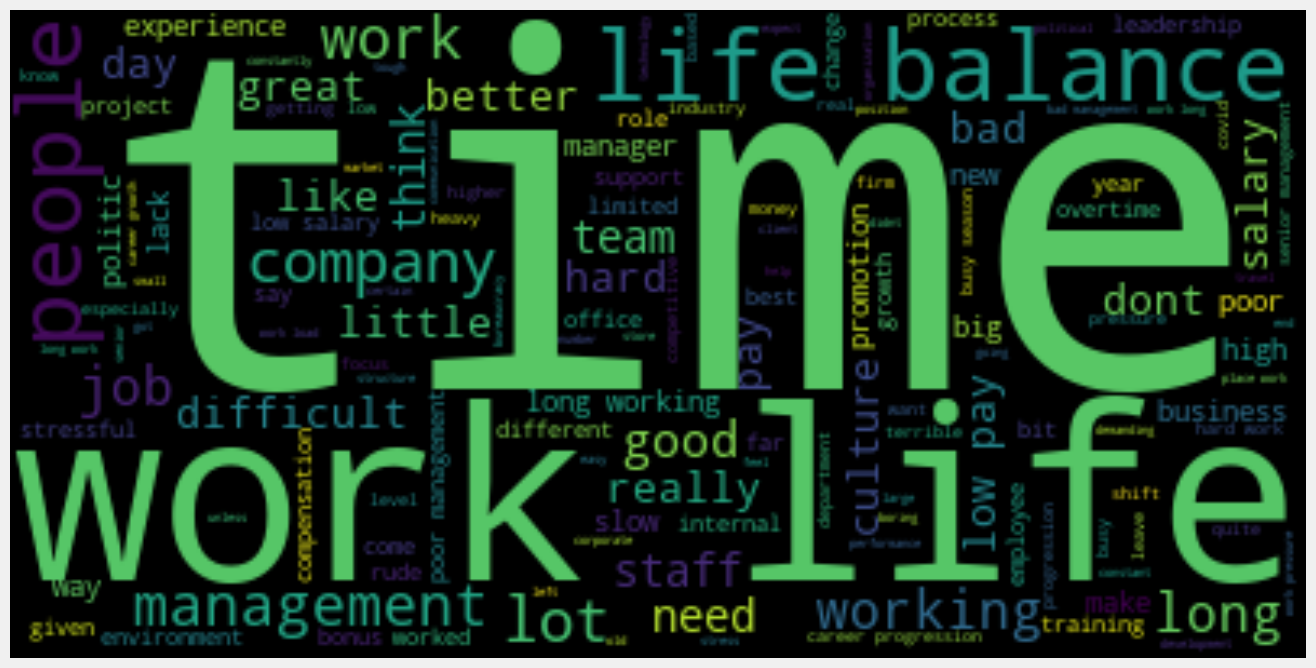

In [65]:
wc = WordCloud(stopwords = text.ENGLISH_STOP_WORDS, 
               max_font_size = 150 , 
               random_state = 42)
corpus = ''
for corp in df['cons'].values:
    corpus = corpus+' '+corp
wc.generate(corpus)
plt.figure(1 , figsize = (15 , 8))
plt.imshow(wc , interpolation="bilinear")
plt.axis("off")
plt.show()

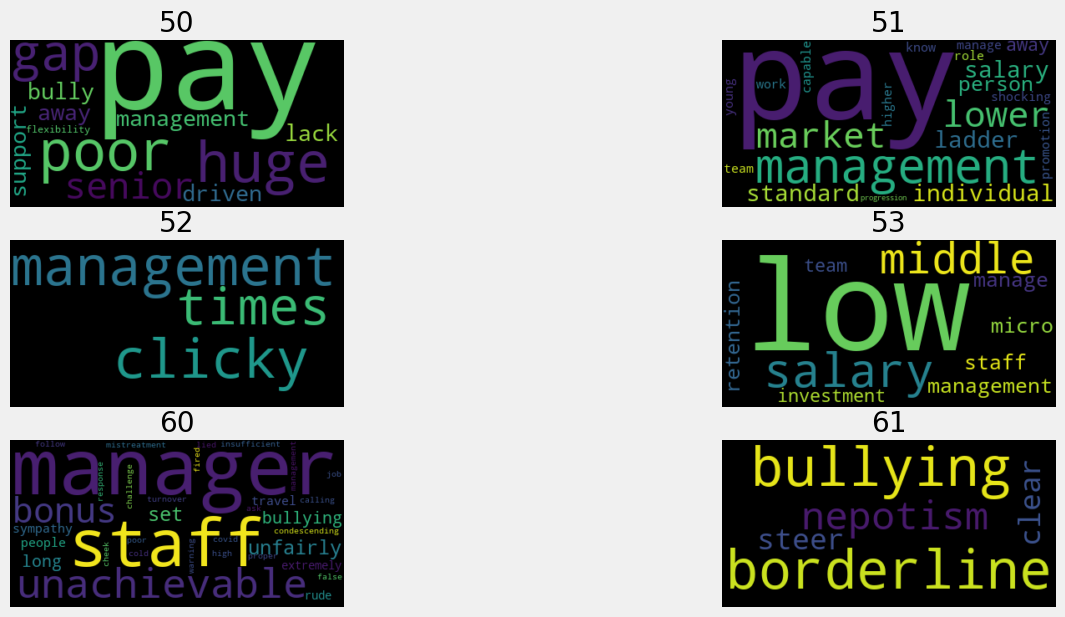

In [66]:
wc = WordCloud(stopwords = text.ENGLISH_STOP_WORDS.union(['Apple' , 'Google' , 'Facebook' , 'Amazon' , 'Netflix' , 'Microsoft']), 
               max_font_size = 150 , 
               random_state = 42)

plt.figure(1 , figsize = (15 , 7))
for corpus , i in zip(df['cons'].values,range(6)):
    wc.generate(corpus)
    plt.subplot(3 , 2 , i + 1)
    plt.imshow(wc , interpolation="bilinear")
    plt.axis("off")
    plt.title(df.index[i])
plt.show()

In [67]:
df.to_csv('Glassdoor-Reviews-Dataset-Cleaned.csv', index=None, columns=["firm", "summary", "headline", "pros", "cons", "overall_rating"])